#### **Processamento de Áudio e Imagem** (2º semestre de 2024)

### **Experiência: Filtragem de imagens**


##### **Nome:** Ivan Matos

##### 20 de novembro de 2024

---
---

In [1]:
using DSP, FFTW, LaTeXStrings, MAT, PyPlot, Colors, Plots
using Images, ImageIO, FileIO

# using FFTViews, OffsetArrays
# using ImageFiltering

Inicialmente, carregamos a imagem de interesse:

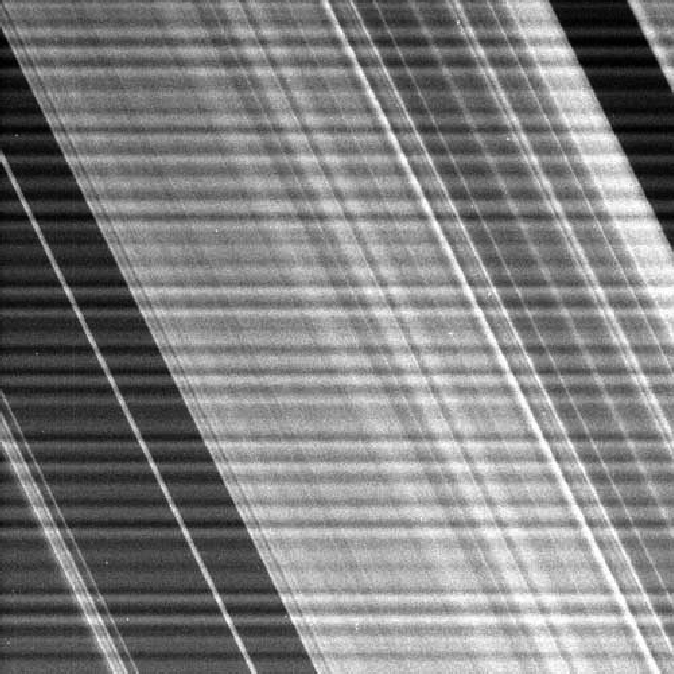

In [2]:
x = load("cassini-interference.tif")

A imagem está em escala de cinza, e apresenta dimensões (674, 674).

In [3]:
(N1,N2) = size(x)

(674, 674)

Observamos a presença de um padrão horizontal na imagem, causado por interferência eletromagnética. O objetivo desta atividade é remover a interferência, por meio de *filtragem*.

#### **TDF-2D da imagem**

A seguir, calculamos a Transformada Discreta de Fourier bidimensional (TDF-2D) da imagem.

In [4]:
X = fft(channelview(x))

674×674 Matrix{ComplexF32}:
 2.27932f5-0.000713348im  -22329.2+26114.6im  …  -22329.2-26114.6im
  -2998.18+9863.19im      -8041.75-43.2289im      18120.9-886.359im
  -458.863+7646.6im       -4568.81+1842.65im      6681.83+2957.09im
    945.93+3455.56im      -2265.48-146.048im      5532.71-53.5732im
  -216.382+2887.91im      -2599.14+170.006im      2701.33+210.824im
   118.654+2049.46im       -1906.4-23.0448im  …   2400.55-55.6762im
   109.536+1817.92im      -1826.32+68.1468im      1757.84-74.5673im
   40.1403+1831.55im      -1698.16+175.47im       1418.21+199.864im
   167.695+1565.91im      -1298.47+76.1308im      1512.82+124.495im
   418.674+1367.85im      -1254.09+83.2934im      1229.09+293.859im
          ⋮                                   ⋱  
   418.675-1367.85im       1229.09-293.859im  …  -1254.09-83.2938im
   167.696-1565.91im       1512.82-124.495im     -1298.47-76.131im
   40.1392-1831.55im       1418.21-199.864im     -1698.16-175.47im
   109.538-1817.92im       1757.84+74.56

In [5]:
# plot(abs.(fft(channelview(x))))
# PyPlot.display_figs()

No gráfico abaixo, mostramos o módulo da TDF-2D calculada:

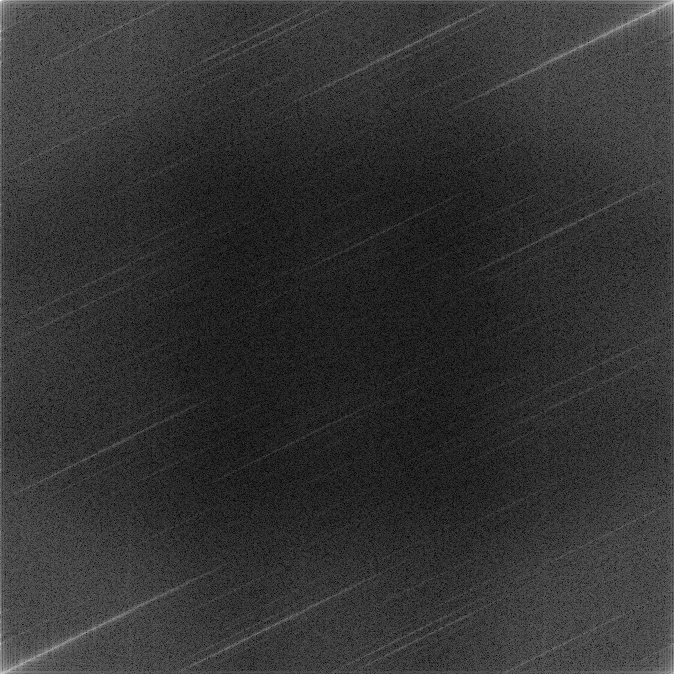

In [6]:
Gray.(log.(abs.(X) .+ 1) ./ maximum(log.(abs.(X) .+ 1)))

Conforme descrito no roteiro da experiência, é mais conveniente exibir o espectro com a origem situada no centro da imagem. Para obter tal deslocamento em frequência, podemos multiplicar a imagem original $x[n_1, n_2]$, no domínio espacial, por

$$
e^{j \frac{2\pi}{N_1}n_1\frac{N_1}{2}} \cdot e^{j \frac{2\pi}{N_2}n_2\frac{N_2}{2}} = (-1)^{n_1+n_2}.
$$

No código, efetuamos a multiplicação ponto-a-ponto entre a imagem original ``x`` e uma matriz ``mat_desloc``, cujo elemento na posição $(n_1, n_2)$ é igual $(-1)^{n_1+n_2}$.

A imagem resultante, armazenada na variável ``x_cent``, é mostrada abaixo:

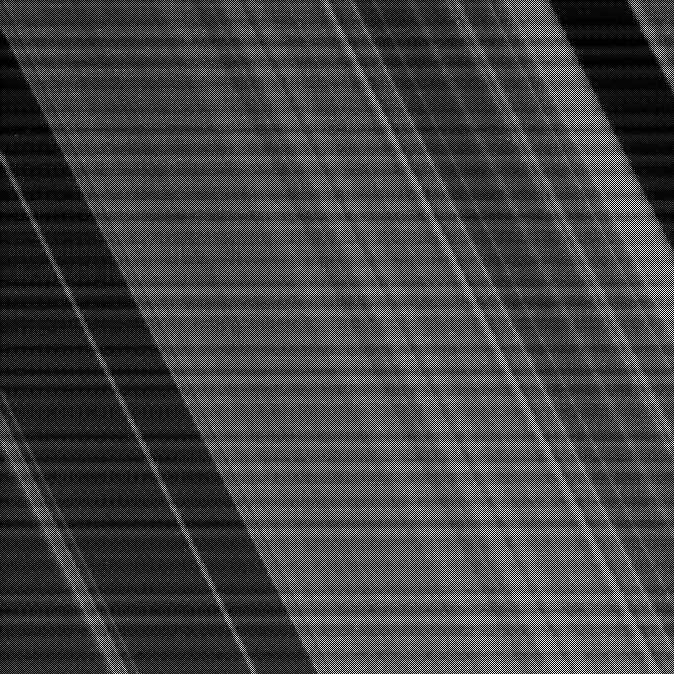

In [7]:
mat_desloc = ones(N1,N2)

for i in 1:N1
    for j in 1:N2
        mat_desloc[i,j] = (-1)^(i+j)
    end
end

x_cent = x .* mat_desloc

A seguir, calculamos a TDF-2D da imagem dada por $(-1)^{n_1 + n_2} \, x[n_1,n_2]$, e mostramos o módulo do seu espectro.

In [8]:
X_cent = fft(channelview(x_cent))

674×674 Matrix{ComplexF64}:
   -3.40392-1.22125e-14im     1.46109+2.82979im   …     1.46109-2.82979im
    4.03857-3.53844im         2.19686-0.861102im       0.140218+1.60212im
 -0.0803402+2.59607im          1.6368-1.05482im        0.733184-1.36981im
     5.4882-0.0223758im       2.91434+2.95664im          2.7762+0.952593im
  -0.798229+3.02611im       -0.207202-1.83392im      -0.0260443-3.12563im
    5.22674-2.81184im         1.36748+0.442152im  …     5.59236+0.888959im
   -0.22951+6.25374im        -1.34998-1.68203im         0.41588-3.14455im
   0.150963+1.04276im         2.41689-1.08357im           7.598+6.59889im
   -7.16238-0.381001im        1.52499+2.92298im        -3.46488+0.598537im
   0.179382+1.35139im         -1.1453+1.33105im        -2.88263+5.11055im
           ⋮                                      ⋱  
   0.179382-1.35139im        -2.88263-5.11055im   …     -1.1453-1.33105im
   -7.16238+0.381001im       -3.46488-0.598537im        1.52499-2.92298im
   0.150963-1.04276im      

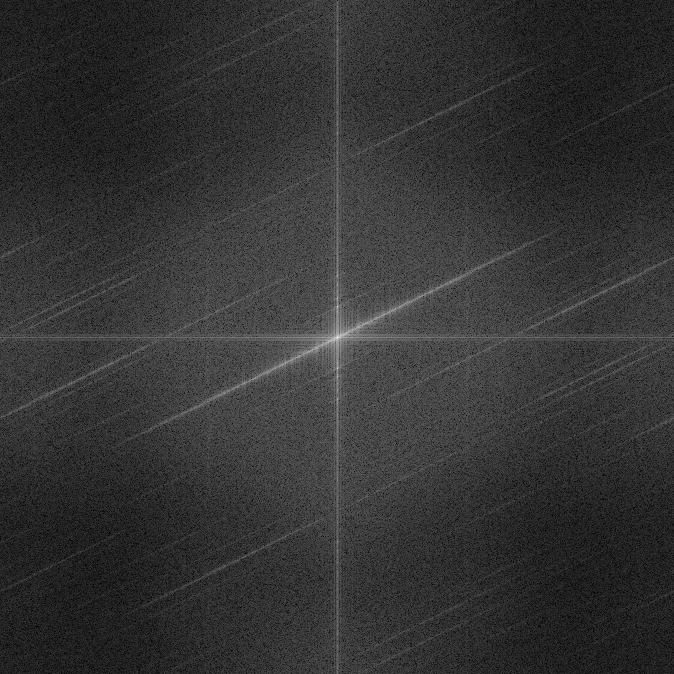

In [9]:
Gray.(log.(abs.(X_cent) .+ 1) ./ maximum(log.(abs.(X_cent) .+ 1)))

Em particular, o centro do espectro agora corresponde ao nível DC da imagem.

**Região espectral correspondente à interferência**

Como mencionado inicialmente, a imagem analisada contém um padrão ***horizontal***, provocado por interferência. No gráfico do módulo da TDF-2D, esperamos que tal padrão corresponda a pontos sobre uma reta ***vertical*** que passa pelo centro. No gráfico do módulo da TDF-2D, os pontos aparecem aos pares, segundo simetria radial. 
No caso da presença de um padrão *perfeitamente senoidal* na imagem analisada, esperaríamos encontrar, no espectro, um único par de pontos correspondentes à interferência.

Uma vez que a TDF-2D assume periodicidade da imagem analisada (fora da área de $674 \times 674$ pixels mostrada), observamos que uma reta vertical e outra horizontal passam pelo centro do espectro, devido à descontinuidade nas bordas da imagem (quando estendida de forma periódica).

#### **Filtragem da interferência**

Para remover a interferência, empregaremos um filtro *notch*, conforme especificado no roteiro da experiência. O filtro $H[k_1,k_2]$ projetado deve apresentar uma rejeição de 11 pixels de largura ao longo da faixa de interferência, enquanto mantém uma faixa de passagem de 11 pixels em torno da frequência DC. Na região de frequências que se deseja eliminar, devemos ter $H[k_1,k_2] = 0$, enquanto $H[k_1,k_2] = 1$ nos demais pontos.

**Observação:**
No espectro da imagem, o ponto correspondente ao nível DC encontrava-se originalmente na posição dada pelo par de índices $[1, 1]$. Após a multiplicação da imagem por $(-1)^{n_1 + n_2}$, o espectro é deslocado, e o ponto correspondente ao nível DC passa a estar "centralizado", na posição $\big[1 + \frac{N_1}{2}, 1 + \frac{N_2}{2}\big]$, isto é, $[338, 338]$.

A seguir, projetamos o filtro $H[k_1,k_2]$, diretamente no domínio da frequência.

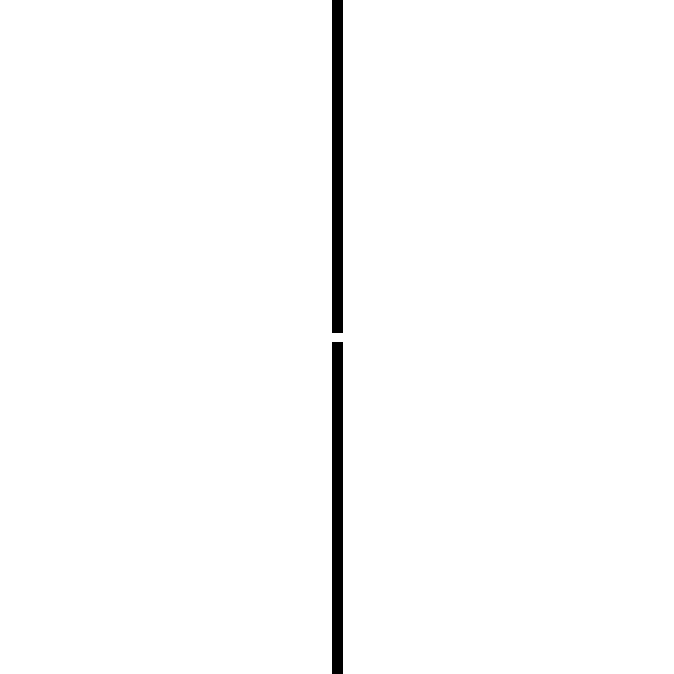

In [ ]:
H = ones(N1,N2)

H[1+Int(N1/2)+5 : N1, 1+Int(N2/2)-5 : 1+Int(N2/2)+5] .= 0
H[1:1+Int(N1/2)-5, 1+Int(N2/2)-5 : 1+Int(N2/2)+5] .= 0

Gray.(H)

Na imagem acima, correspondente ao módulo da resposta em frequência do filtro, pontos brancos representam o valor 1, enquanto pontos pretos representam 0.

A seguir, multiplicamos a TDF-2D da imagem pela função de transferência desejada:

In [11]:
X_filt = X_cent .* H

674×674 Matrix{ComplexF64}:
   -3.40392-1.22125e-14im     1.46109+2.82979im   …     1.46109-2.82979im
    4.03857-3.53844im         2.19686-0.861102im       0.140218+1.60212im
 -0.0803402+2.59607im          1.6368-1.05482im        0.733184-1.36981im
     5.4882-0.0223758im       2.91434+2.95664im          2.7762+0.952593im
  -0.798229+3.02611im       -0.207202-1.83392im      -0.0260443-3.12563im
    5.22674-2.81184im         1.36748+0.442152im  …     5.59236+0.888959im
   -0.22951+6.25374im        -1.34998-1.68203im         0.41588-3.14455im
   0.150963+1.04276im         2.41689-1.08357im           7.598+6.59889im
   -7.16238-0.381001im        1.52499+2.92298im        -3.46488+0.598537im
   0.179382+1.35139im         -1.1453+1.33105im        -2.88263+5.11055im
           ⋮                                      ⋱  
   0.179382-1.35139im        -2.88263-5.11055im   …     -1.1453-1.33105im
   -7.16238+0.381001im       -3.46488-0.598537im        1.52499-2.92298im
   0.150963-1.04276im      

No gráfico abaixo, mostramos o módulo do espectro resultante:

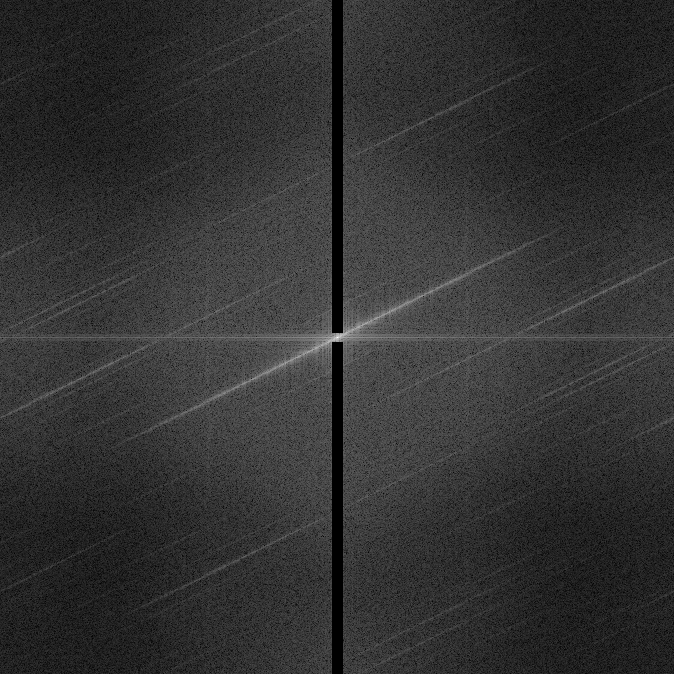

In [12]:
Gray.(log.(abs.(X_filt) .+ 1) ./ maximum(log.(abs.(X_filt) .+ 1)))

Finalmente, para obter a imagem filtrada a partir do espectro acima, procedemos como segue:

- Calculamos a inversa da TDF-2D do espectro obtido,
- Multiplicamos a imagem resultante por $(-1)^{n_1 + n_2}$, para desfazer o deslocamento em frequência,
- Tomamos a parte real da imagem.

A imagem final, filtrada, é armazenada em ``x_filt``.

In [13]:
x_filt = real.(ifft(X_filt)) .* mat_desloc

674×674 Matrix{Float64}:
 0.236645  0.233902  0.372473  0.43667   …  0.484905  0.442539  0.439524
 0.23641   0.233849  0.372596  0.436966     0.484101  0.441929  0.439104
 0.226099  0.223559  0.330966  0.41891      0.469874  0.443374  0.440547
 0.246722  0.243964  0.276661  0.376186     0.467717  0.448795  0.445718
 0.323273  0.320241  0.238932  0.318562     0.482303  0.463128  0.459791
 0.322615  0.319773  0.238648  0.318459  …  0.481056  0.462081  0.458941
 0.412956  0.409852  0.242181  0.27465      0.474076  0.462717  0.459337
 0.445222  0.442036  0.286049  0.263536     0.443841  0.452009  0.448547
 0.40713   0.404206  0.350439  0.288967     0.436326  0.452604  0.449407
 0.406032  0.403302  0.349726  0.288442     0.434625  0.451107  0.448111
 ⋮                                       ⋱                      
 0.269097  0.273166  0.288846  0.308292  …  0.644237  0.699727  0.704093
 0.269728  0.273955  0.289787  0.309379     0.644366  0.700029  0.704562
 0.247424  0.251855  0.287526  0.3

A seguir, mostramos a imagem filtrada:

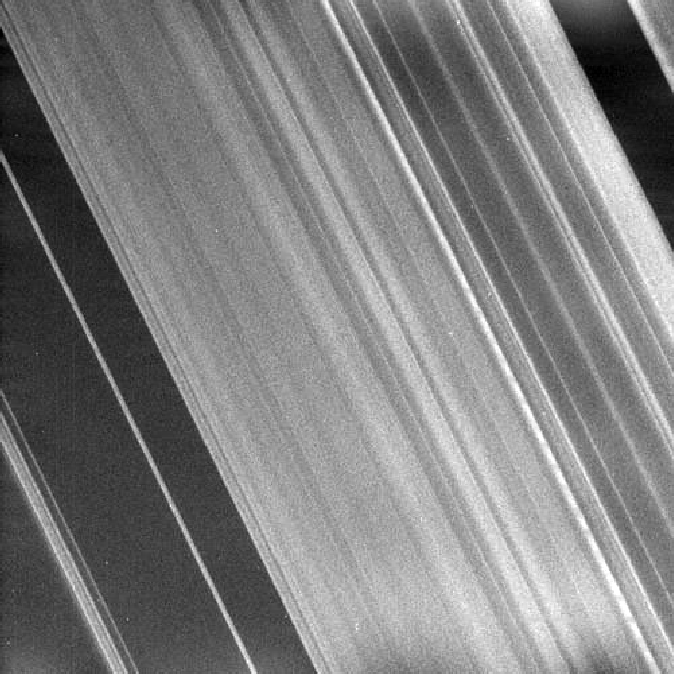

In [14]:
Gray.(x_filt)

Podemos observar que a interferência (padrão horizontal) é satisfatoriamente removida da imagem. Por outro lado, pode-se notar, nas bordas, a presença de efeitos que não existiam na imagem original. Tais efeitos são provocados pela convolução circular.